# Mapa de posiciones de estaciones

Mapa para: Luis Fernando Ricardez Puente
Realizado por: Adolfo Perez Estrada

In [1]:
import pandas as pd
import netCDF4 as nc
import numpy as np
import geopandas as gpd
import seaborn as sns
import shapely
from shapely.geometry import shape, Polygon, Point, MultiPoint, box, LineString

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import cartopy
from cartopy import config
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [57]:
# Abrimos el archivo de observation well y municipios
direccion_puntos = 'C:/Users/adolf/Downloads/map_LFRP/puntos.shp'
obs_well = gpd.read_file(direccion_puntos)

direccion_municipios = 'C:/Users/adolf/Downloads/muni_2018gw/muni_2018gw.shp'
municipios = gpd.read_file(direccion_municipios)

direccion_estados = 'C:/Users/adolf/Downloads/dest_2015gw/dest_2015gw.shp'
estados = gpd.read_file(direccion_estados)

<AxesSubplot:>

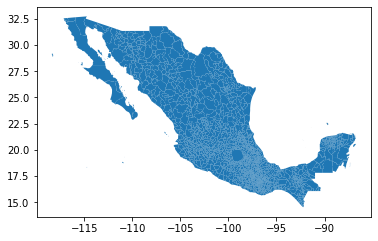

In [6]:
ax = obs_well.plot()
municipios.plot(ax=ax)

In [73]:
Estaciones = pd.read_csv('C:/Users/adolf/Downloads/map_LFRP/Estaciones.csv')

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

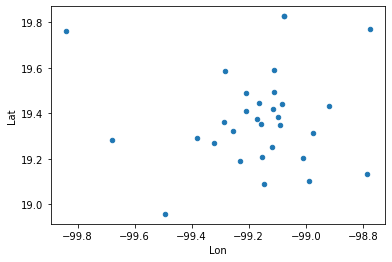

In [74]:
Estaciones.plot(x='Lon', y='Lat', kind= 'scatter')

In [75]:
Estaciones['geometry']=Estaciones[['Lon','Lat']].apply(Point,axis=1)

In [78]:
Estaciones_gpd = gpd.GeoDataFrame(Estaciones,crs='EPSG:4326')

<AxesSubplot:>

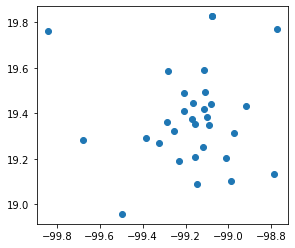

In [82]:
Estaciones_gpd.plot()

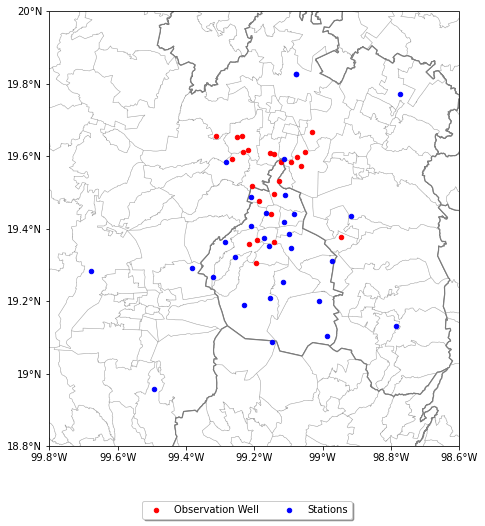

In [97]:
f, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection":ccrs.PlateCarree()})

ax.set_extent([-99.8, -98.6, 18.8, 20], ccrs.PlateCarree())

ax.set_xticks(np.arange(-99.8,-98.4,0.2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(18.8,20.2,0.2), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)


estados.plot(ax=ax, color = 'w', edgecolor='k', linewidth=1.2)
municipios.plot(ax=ax, color = 'w', edgecolor='gray', linewidth=0.5, alpha = 0.5)
obs_well.plot( color = 'red', markersize = 20, legend=True,label ="Observation Well", ax=ax)
Estaciones_gpd.plot(color = 'blue',markersize = 20, legend=True,label = "Stations",ax=ax)

#ax.legend().set_visible(True)

#LEYENDA COMPARTIDA
lines, labels = f.axes[-1].get_legend_handles_labels()
    
f.legend(lines, labels, loc = 'lower center', bbox_to_anchor=(0.5, -0.01),ncol=2, fancybox=True, shadow=True)
ax.legend().set_visible(False)